In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline

from importlib.util import find_spec
if find_spec("qml_hep_lhc") is None:
    import sys
    sys.path.append('..')

In [2]:
from qml_hep_lhc.data import ElectronPhoton, MNIST, QuarkGluon
import argparse
from sklearn.decomposition import PCA
import numpy as np

2022-07-13 11:26:47.388342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-13 11:26:47.388412: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Electron Photon

In [3]:
args = argparse.Namespace()
args.dataset_type = 'med'
args.center_crop = 0.2

data = ElectronPhoton(args)
data.prepare_data()
data.setup()

None
/home/gopald/Documents/qml-hep-lhc/datasets/downloaded
Center cropping...


2022-07-13 11:27:29.222535: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-13 11:27:29.222633: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bhagvada): /proc/driver/nvidia/version does not exist
2022-07-13 11:27:29.245779: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Center cropping...


In [4]:
data

Dataset :Electron Photon med
╒════════╤═════════════════╤═════════════════╤═══════════╕
│ Data   │ Train size      │ Test size       │ Dims      │
╞════════╪═════════════════╪═════════════════╪═══════════╡
│ X      │ (9000, 8, 8, 1) │ (1000, 8, 8, 1) │ (8, 8, 1) │
├────────┼─────────────────┼─────────────────┼───────────┤
│ y      │ (9000,)         │ (1000,)         │ (1,)      │
╘════════╧═════════════════╧═════════════════╧═══════════╛

Train images stats
Min: 0.00
Max: 1.44
Mean: 0.02
Std: 0.09
Train labels stats
Min: 0.00
Max: 1.00

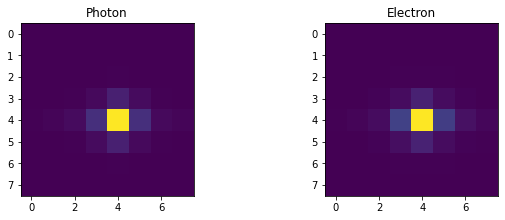

In [5]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
index = [np.where(data.y_train == 0)[0], np.where(data.y_train == 1)[0]] # Photon, Electron
for i in range(columns):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(np.mean(data.x_train[index[i],:,:,0], axis=0))
    plt.title('Photon' if i ==0 else 'Electron')